In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('plant_growth_data.csv')

In [10]:
df.shape

(193, 7)

In [4]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [43]:
df.describe()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.984456,6.826484,0.994819,0.943005,25.076087,58.098927,0.497409
std,0.825862,1.599509,0.787251,0.785192,5.354170,12.631799,0.501294
min,0.000000,4.033133,0.000000,0.000000,15.200000,30.567682,0.000000
25%,0.000000,5.477000,0.000000,0.000000,20.637095,49.300000,0.000000
50%,1.000000,6.833290,1.000000,1.000000,25.912336,59.182806,0.000000
75%,2.000000,8.241144,2.000000,2.000000,29.757938,69.100000,1.000000
max,2.000000,9.913903,2.000000,2.000000,34.810103,79.648240,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
df['Soil_Type']= label_encoder.fit_transform(df['Soil_Type']) 
df['Water_Frequency']= label_encoder.fit_transform(df['Water_Frequency']) 
df['Fertilizer_Type']= label_encoder.fit_transform(df['Fertilizer_Type']) 

In [6]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,5.192294,0,0,31.719602,61.591861,0
1,2,4.033133,2,2,28.919484,52.422276,1
2,1,8.892769,0,1,23.179059,44.660539,0
3,1,8.241144,0,1,18.465886,46.433227,0
4,2,8.374043,0,2,18.128741,63.625923,0


In [11]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [12]:
df['Growth_Milestone'].value_counts()

0    97
1    96
Name: Growth_Milestone, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
def draw_hist(df:pd.DataFrame):
    fig, axs = plt.subplots(2, 3, figsize = (15, 10))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3  
        sns.histplot(x=column, data=df, ax=axs[row_index, col_index], alpha=0.5, kde=True)
        axs[row_index, col_index].set_title(f'Hist Plot of {column}')
    plt.tight_layout()
    plt.show()

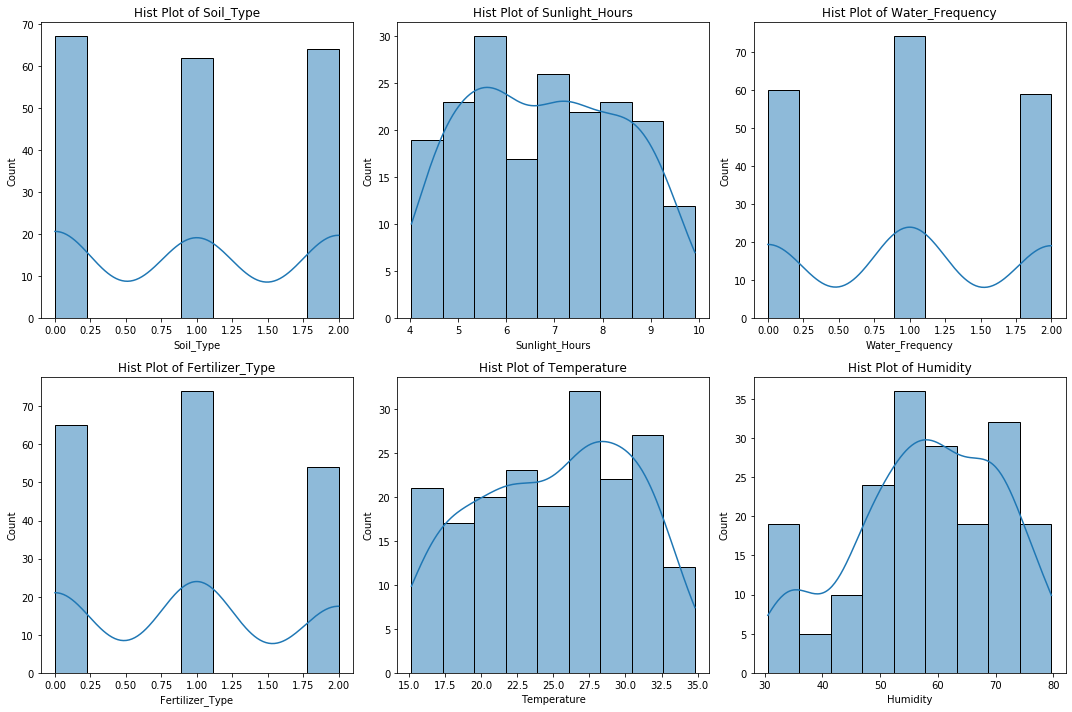

In [29]:
draw_hist(df)

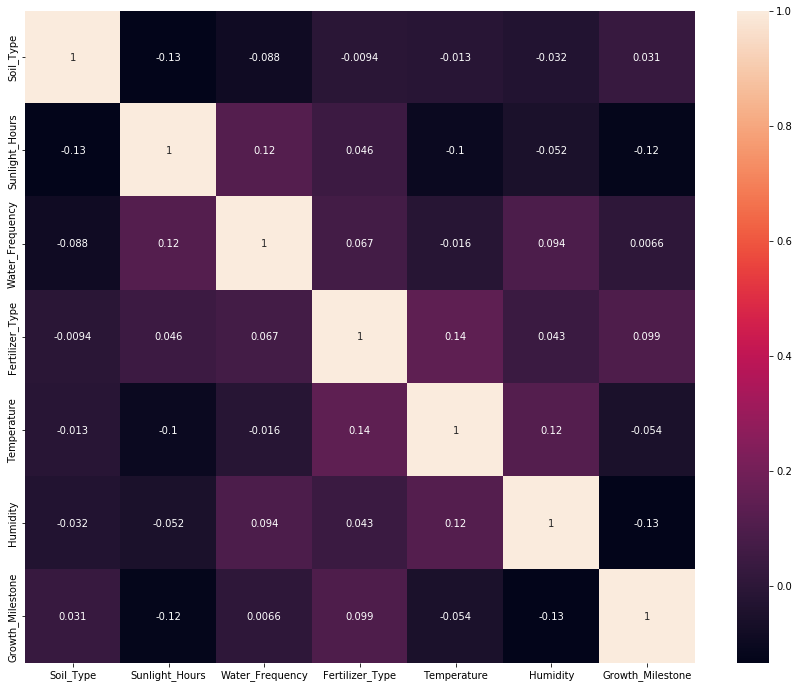

In [30]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.show()

## Baseline Model

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Growth_Milestone',axis=1),df['Growth_Milestone'],test_size=0.2,random_state=42)

In [36]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.48717948717948717
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[11  6]
 [14  8]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.44      0.65      0.52        17
           1       0.57      0.36      0.44        22

    accuracy                           0.49        39
   macro avg       0.51      0.51      0.48        39
weighted avg       0.51      0.49      0.48        39



In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.41025641025641024
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[ 7 10]
 [13  9]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.35      0.41      0.38        17
           1       0.47      0.41      0.44        22

    accuracy                           0.41        39
   macro avg       0.41      0.41      0.41        39
weighted avg       0.42      0.41      0.41        39



In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred =gnb.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5384615384615384
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[11  6]
 [12 10]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.48      0.65      0.55        17
           1       0.62      0.45      0.53        22

    accuracy                           0.54        39
   macro avg       0.55      0.55      0.54        39
weighted avg       0.56      0.54      0.54        39



In [41]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred =svc.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.4358974358974359
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[ 6 11]
 [11 11]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.35      0.35      0.35        17
           1       0.50      0.50      0.50        22

    accuracy                           0.44        39
   macro avg       0.43      0.43      0.43        39
weighted avg       0.44      0.44      0.44        39



In [42]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5128205128205128
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[ 8  9]
 [10 12]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.44      0.47      0.46        17
           1       0.57      0.55      0.56        22

    accuracy                           0.51        39
   macro avg       0.51      0.51      0.51        39
weighted avg       0.52      0.51      0.51        39



In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred =dt.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.6410256410256411
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[10  7]
 [ 7 15]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.68      0.68      0.68        22

    accuracy                           0.64        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.64      0.64      0.64        39



# Optimization
## Scaling

In [47]:
X = df.drop('Growth_Milestone',axis=1)
y = df['Growth_Milestone']

In [48]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print("Values of x after standardization: \n", X_scaled)

Values of x after standardization: 
 [[ 0.01887054 -1.02433992 -1.26694729 -1.20411038  1.24403863  0.27723828]
 [ 1.2328751  -1.75092318  1.28014466  1.34966219  0.7196995  -0.45056247]
 [ 0.01887054  1.29518422 -1.26694729  0.0727759  -0.35522993 -1.06662074]
 ...
 [ 0.01887054 -1.18624331 -1.26694729  0.0727759  -0.1078757   0.28582143]
 [ 1.2328751   0.9067021   0.00659868  1.34966219  0.52879492  0.90491664]
 [-1.19513402 -0.05922449  1.28014466  0.0727759  -0.63219268 -0.09516024]]


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [50]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train,y_train)
y_pred =lr_scaled.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.48717948717948717
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[11  6]
 [14  8]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.44      0.65      0.52        17
           1       0.57      0.36      0.44        22

    accuracy                           0.49        39
   macro avg       0.51      0.51      0.48        39
weighted avg       0.51      0.49      0.48        39



In [51]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train,y_train)
y_pred =knn_scaled.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5128205128205128
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[10  7]
 [12 10]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.45      0.59      0.51        17
           1       0.59      0.45      0.51        22

    accuracy                           0.51        39
   macro avg       0.52      0.52      0.51        39
weighted avg       0.53      0.51      0.51        39



In [52]:
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train,y_train)
y_pred =gnb_scaled.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5384615384615384
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[11  6]
 [12 10]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.48      0.65      0.55        17
           1       0.62      0.45      0.53        22

    accuracy                           0.54        39
   macro avg       0.55      0.55      0.54        39
weighted avg       0.56      0.54      0.54        39



In [54]:
svc_scaled = SVC()
svc_scaled.fit(X_train,y_train)
y_pred =svc_scaled.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.48717948717948717
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[ 9  8]
 [12 10]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.43      0.53      0.47        17
           1       0.56      0.45      0.50        22

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.49        39
weighted avg       0.50      0.49      0.49        39



In [55]:
rf_scaled = RandomForestClassifier()
rf_scaled.fit(X_train,y_train)
y_pred =rf_scaled.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.6153846153846154
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[10  7]
 [ 8 14]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.56      0.59      0.57        17
           1       0.67      0.64      0.65        22

    accuracy                           0.62        39
   macro avg       0.61      0.61      0.61        39
weighted avg       0.62      0.62      0.62        39



In [56]:
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train,y_train)
y_pred =dt_scaled.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.6923076923076923
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[ 9  8]
 [ 4 18]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.69      0.53      0.60        17
           1       0.69      0.82      0.75        22

    accuracy                           0.69        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.69      0.69      0.68        39



# Cross Validation
## K-Fold

In [71]:
from sklearn.model_selection import KFold,cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
import numpy as np

k_folds = KFold(n_splits = 5)

In [74]:
lr_score = cross_val_score(lr_scaled,X,y,cv=k_folds)
lr_predict = cross_val_predict(lr_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(lr_score))
print("K-Fold Score: {}".format(np.mean(lr_predict)))

Accuracy score in each iteration: [0.56410256 0.58974359 0.66666667 0.57894737 0.44736842]
K-Fold Score: 0.47150259067357514


In [75]:
knn_score = cross_val_score(knn_scaled,X,y,cv=k_folds)
knn_predict = cross_val_predict(knn_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(knn_score))
print("K-Fold Score: {}".format(np.mean(knn_predict)))

Accuracy score in each iteration: [0.58974359 0.53846154 0.58974359 0.52631579 0.42105263]
K-Fold Score: 0.5077720207253886


In [76]:
gnb_score = cross_val_score(gnb_scaled,X,y,cv=k_folds)
gnb_predict = cross_val_predict(gnb_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(gnb_score))
print("K-Fold Score: {}".format(np.mean(gnb_predict)))

Accuracy score in each iteration: [0.51282051 0.58974359 0.61538462 0.60526316 0.47368421]
K-Fold Score: 0.49222797927461137


In [77]:
svc_score = cross_val_score(svc_scaled,X,y,cv=k_folds)
svc_predict = cross_val_predict(svc_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(svc_score))
print("K-Fold Score: {}".format(np.mean(svc_predict)))

Accuracy score in each iteration: [0.56410256 0.56410256 0.56410256 0.55263158 0.52631579]
K-Fold Score: 0.6424870466321243


In [78]:
rf_score = cross_val_score(rf_scaled,X,y,cv=k_folds)
rf_predict = cross_val_predict(rf_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(rf_score))
print("K-Fold Score: {}".format(np.mean(rf_predict)))

Accuracy score in each iteration: [0.61538462 0.61538462 0.51282051 0.60526316 0.47368421]
K-Fold Score: 0.5129533678756477


In [79]:
dt_score = cross_val_score(dt_scaled,X,y,cv=k_folds)
dt_predict = cross_val_predict(dt_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(dt_score))
print("K-Fold Score: {}".format(np.mean(dt_predict)))

Accuracy score in each iteration: [0.64102564 0.56410256 0.51282051 0.68421053 0.44736842]
K-Fold Score: 0.48186528497409326


## Stratified K-Fold

In [80]:
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
import numpy as np

k_folds = StratifiedKFold(n_splits = 5)

In [81]:
lr_score = cross_val_score(lr_scaled,X,y,cv=k_folds)
lr_predict = cross_val_predict(lr_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(lr_score))
print("K-Fold Score: {}".format(np.mean(lr_predict)))

Accuracy score in each iteration: [0.56410256 0.56410256 0.64102564 0.57894737 0.44736842]
K-Fold Score: 0.48186528497409326


In [82]:
knn_score = cross_val_score(knn_scaled,X,y,cv=k_folds)
knn_predict = cross_val_predict(knn_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(knn_score))
print("K-Fold Score: {}".format(np.mean(knn_predict)))

Accuracy score in each iteration: [0.56410256 0.51282051 0.53846154 0.52631579 0.42105263]
K-Fold Score: 0.5077720207253886


In [83]:
gnb_score = cross_val_score(gnb_scaled,X,y,cv=k_folds)
gnb_predict = cross_val_predict(gnb_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(gnb_score))
print("K-Fold Score: {}".format(np.mean(gnb_predict)))

Accuracy score in each iteration: [0.56410256 0.64102564 0.56410256 0.60526316 0.47368421]
K-Fold Score: 0.48186528497409326


In [84]:
svc_score = cross_val_score(svc_scaled,X,y,cv=k_folds)
svc_predict = cross_val_predict(svc_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(svc_score))
print("K-Fold Score: {}".format(np.mean(svc_predict)))

Accuracy score in each iteration: [0.56410256 0.61538462 0.64102564 0.55263158 0.52631579]
K-Fold Score: 0.6476683937823834


In [85]:
rf_score = cross_val_score(rf_scaled,X,y,cv=k_folds)
rf_predict = cross_val_predict(rf_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(rf_score))
print("K-Fold Score: {}".format(np.mean(rf_predict)))

Accuracy score in each iteration: [0.61538462 0.71794872 0.51282051 0.60526316 0.44736842]
K-Fold Score: 0.5077720207253886


In [86]:
dt_score = cross_val_score(dt_scaled,X,y,cv=k_folds)
dt_predict = cross_val_predict(dt_scaled,X,y,cv=k_folds)
print("Accuracy score in each iteration: {}".format(dt_score))
print("K-Fold Score: {}".format(np.mean(dt_predict)))

Accuracy score in each iteration: [0.61538462 0.56410256 0.51282051 0.65789474 0.42105263]
K-Fold Score: 0.45595854922279794


# Hyperparameter Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [100]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider for split
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

In [101]:
grid_gs = GridSearchCV(rf, param_grid)
grid_gs.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",grid_rs.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [93]:
rf_cv = RandomForestClassifier(n_estimators= 500, min_samples_split= 10, min_samples_leaf= 4, max_features= 'auto', max_depth= 40, bootstrap= True)
rf_cv.fit(X_train,y_train)
y_pred =rf_cv.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5641025641025641
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[11  6]
 [11 11]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.50      0.65      0.56        17
           1       0.65      0.50      0.56        22

    accuracy                           0.56        39
   macro avg       0.57      0.57      0.56        39
weighted avg       0.58      0.56      0.56        39



In [95]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure the quality of a split
    'splitter': ['best', 'random'],               # Strategy used to split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_leaf_nodes': [None, 10, 20, 30],         # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.01, 0.1],    # A node will be split if this split induces a decrease of impurity greater than or equal to this value
}

In [96]:
grid_rs = RandomizedSearchCV(dt, param_grid)
grid_rs.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",grid_rs.best_params_)


 The best parameters across ALL searched params:
 {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}


In [97]:
dt_cv = DecisionTreeClassifier(splitter= 'random', min_samples_split= 5, min_samples_leaf= 4, min_impurity_decrease= 0.01, max_leaf_nodes= None, max_features= None, max_depth= 30, criterion= 'gini')
dt_cv.fit(X_train,y_train)
y_pred =dt_cv.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5128205128205128
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[12  5]
 [14  8]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.46      0.71      0.56        17
           1       0.62      0.36      0.46        22

    accuracy                           0.51        39
   macro avg       0.54      0.53      0.51        39
weighted avg       0.55      0.51      0.50        39

